**Nama : Dadan Dahman Wahidi**

**Proyek Pertama : Membuat Model NLP dengan TensorFlow**

Keterangan Proyek Akhir :

    Dataset yang dipakai adalah bersumber dari : https://www.kaggle.com/atulanandjha/imdb-50k-movie-reviews-test-your-bert
    Menggunakan LSTM dalam arsitektur model.
    Menggunakan model sequential.
    Validation set sebesar 20% dari total dataset.
    Menggunakan Embedding.
    Menggunakan model sequential.
    Menggunakan fungsi tokenizer.
    Mengimplementasikan Callback
    Plot loss dan akurasi
    Program dikerjakan pada Google Colaboratory.
    Menggunakan bahasa pemrograman Python.


# Multiclass Text Classification

In [35]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Kita akan melakukan klasifikasi teks multikelas menggunakan lstm.

Pada latihan ini kita akan menggunakan dataset yang berisi review beberapa film. Dataset dapat Anda unduh pada [tautan](https://www.kaggle.com/atulanandjha/imdb-50k-movie-reviews-test-your-bert) berikut.



### Load Dataset
Pada cell pertama impor library pandas dan ubah dataset menjadi dataframe.

In [36]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dicoding/dataset/review_film.csv')

In [37]:
df

,text,sentiment
0,"Now, I won't deny that when I purchased this o...",neg
1,"The saddest thing about this ""tribute"" is that...",neg
2,Last night I decided to watch the prequel or s...,neg
3,I have to admit that i liked the first half of...,neg
4,I was not impressed about this film especially...,neg
...,...,...
24995,"This film is fun, if your a person who likes a...",pos
24996,After seeing this film I feel like I know just...,pos
24997,first this deserves about 5 stars due to actin...,neg
24998,If you like films that ramble with little plot...,neg


### Callback
Kemudian kita buat function callback, fungsinya untuk mencegah adanya overfitting dan menghentikan training setelah selesai mengakurasi.

In [48]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.95):
      print("\nAkurasi di atas 95%, Training Berhenti!")
      self.model.stop_training = True

callbacks = myCallback()

### Encoding

Ubah bentuk data pada kolom sentiment menjadi bentuk angka untuk labeling setiap data.

In [38]:
cat = pd.get_dummies(df.sentiment)
df = pd.concat([df, cat], axis=1)
df = df.drop(columns='sentiment')

In [39]:
df

,text,neg,pos
0,"Now, I won't deny that when I purchased this o...",1,0
1,"The saddest thing about this ""tribute"" is that...",1,0
2,Last night I decided to watch the prequel or s...,1,0
3,I have to admit that i liked the first half of...,1,0
4,I was not impressed about this film especially...,1,0
...,...,...,...
24995,"This film is fun, if your a person who likes a...",0,1
24996,After seeing this film I feel like I know just...,0,1
24997,first this deserves about 5 stars due to actin...,1,0
24998,If you like films that ramble with little plot...,1,0


### Split Dataframe

Agar dapat diproses oleh model, kita perlu mengubah nilai-nilai dari dataframe ke dalam tipe data numpy array menggunakan atribut values.

In [40]:
review = df['text'].values
label = df[['neg', 'pos']].values

In [41]:
review

array(["Now, I won't deny that when I purchased this off eBay, I had high expectations. This was an incredible out-of-print work from the master of comedy that I so enjoy. However, I was soon to be disappointed. Apologies to those who enjoyed it, but I just found the Compleat Al to be very difficult to watch. I got a few smiles, sure, but the majority of the funny came from the music videos (which I've got on DVD) and the rest was basically filler. You could tell that this was not Al's greatest video achievement (that honor goes to UHF). Honestly, I doubt if this will ever make the jump to DVD, so if you're an ultra-hardcore Al fan and just HAVE to own everything, buy the tape off eBay. Just don't pay too much for it.",
       'The saddest thing about this "tribute" is that almost all the singers (including the otherwise incredibly talented Nick Cave) seem to have missed the whole point where Cohen\'s intensity lies: by delivering his lines in an almost tuneless poise, Cohen transmits 

In [42]:
label

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [43]:
from sklearn.model_selection import train_test_split

text = df['text'].values
y = df[['pos','neg']].values
text_train , text_test, y_train, y_test = train_test_split(text, y, test_size=0.2)

### Tokenizer
Kemudian kita ubah setiap kata pada dataset kita ke dalam bilangan numerik dengan fungsi Tokenizer. Setelah tokenisasi selesai, kita perlu membuat mengonversi setiap sampel menjadi sequence.

In [44]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#tokenizer
tokenizer = Tokenizer(num_words=280617, oov_token='-')
tokenizer.fit_on_texts(text_train)
tokenizer.fit_on_texts(text_test)

#sequences
seq_train = tokenizer.texts_to_sequences(text_train)
seq_test = tokenizer.texts_to_sequences(text_test)

#padding
pad_train = pad_sequences(seq_train,
                          maxlen=300,
                          padding='post',
                          truncating='post')

pad_test = pad_sequences(seq_test,
                         maxlen=300,
                         padding='post',
                         truncating='post')

### Embedding

Untuk arsitektur model kita menggunakan layer Embedding dengan dimensi embedding sebesar 16, serta dimensi dari input sebesar nilai num_words pada objek tokenizer. Jangan lupa panggil fungsi compile dan tentukan optimizer serta loss function yang akan dipakai oleh model.

In [45]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential

model = Sequential([layers.Embedding(280617, 64, input_length=300),
                    layers.LSTM(64, dropout=0.1),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(2, activation='sigmoid')])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 64)           17959488  
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 130       
Total params: 18,009,218
Trainable params: 18,009,218
Non-trainable params: 0
_________________________________________________________________


# Training Model
Terakhir kita dapat mulai melatih model kita dengan memanggil fungsi fit().

In [47]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [49]:
history = model.fit(pad_train, y_train,
                    batch_size=128,
                    epochs=30,
                    validation_data=(pad_test, y_test),
                    verbose=2,
                    callbacks=[callbacks])

Epoch 1/30
157/157 - 39s - loss: 0.6914 - accuracy: 0.5221 - val_loss: 0.6903 - val_accuracy: 0.4858
Epoch 2/30
157/157 - 30s - loss: 0.6871 - accuracy: 0.5137 - val_loss: 0.6889 - val_accuracy: 0.5242
Epoch 3/30
157/157 - 30s - loss: 0.6853 - accuracy: 0.5307 - val_loss: 0.6830 - val_accuracy: 0.5154
Epoch 4/30
157/157 - 30s - loss: 0.6305 - accuracy: 0.5974 - val_loss: 0.6694 - val_accuracy: 0.6152
Epoch 5/30
157/157 - 30s - loss: 0.6114 - accuracy: 0.6000 - val_loss: 0.7553 - val_accuracy: 0.5378
Epoch 6/30
157/157 - 30s - loss: 0.5574 - accuracy: 0.6230 - val_loss: 0.7113 - val_accuracy: 0.5766
Epoch 7/30
157/157 - 30s - loss: 0.5523 - accuracy: 0.6769 - val_loss: 0.5991 - val_accuracy: 0.7634
Epoch 8/30
157/157 - 30s - loss: 0.4695 - accuracy: 0.7465 - val_loss: 0.7356 - val_accuracy: 0.5636
Epoch 9/30
157/157 - 30s - loss: 0.5302 - accuracy: 0.6378 - val_loss: 0.7689 - val_accuracy: 0.5508
Epoch 10/30
157/157 - 30s - loss: 0.4629 - accuracy: 0.7850 - val_loss: 0.5706 - val_accura

### Evaluation Model
Gunakan library matplotlib untuk membuat plot model

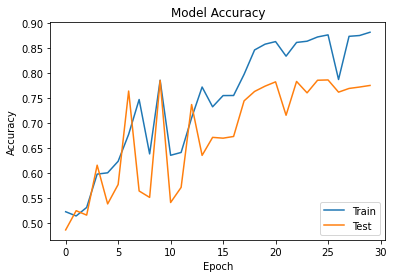

In [52]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Train', 'Test'], loc='lower right')
plt.show()
